In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

In [3]:
#from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_absolute_error

In [4]:
data = pd.read_excel(r'D:\Users\Biki\Google Drive\Desktop\Dataset.xlsx')

In [5]:
data.head()

,ids,bday,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,SleepTime,StudyTime,Average
0,43783,1995-03-22 04:51:23.497,NaN,0.0,0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,0,7.0,1.0,77.8000
1,20278,1995-01-01 14:59:08.973,Philosophy,0.0,0,70.66,179.20,0.0,8.004,00:06:21.250000,89.45,85.25,70.19,73.27,0,5.0,2.0,79.5400
2,20389,1994-12-31 06:47:59.424,NaN,0.0,0,70.68,198.52,0.0,NaN,00:07:00.967000,96.73,86.88,71.20,84.24,0,8.0,7.0,84.7625
3,22820,1994-12-01 13:03:11.340,business administration,1.0,0,NaN,198.34,NaN,8.473,00:12:44.740000,74.06,88.68,55.89,73.16,0,2.0,6.0,72.9475
4,24559,1994-11-10 02:58:07.999,NaN,1.0,1,67.43,128.17,2.0,NaN,00:06:25.506000,82.61,77.30,65.52,80.45,1,7.0,3.0,76.4700


In [6]:
data = data.drop(['Major', 'bday', 'Sprint', 'MileMinDur'], axis=1)

In [7]:
data.isna().sum()

ids           0
Gender        9
Athlete       0
Height       27
Weight       59
Smoking      24
English      26
Reading      10
Math         13
Writing      31
State         0
SleepTime    32
StudyTime    42
Average       0
dtype: int64

In [8]:
data['Height'].fillna(data['Height'].mean(),inplace=True)
data['Weight'].fillna(data['Weight'].mean(),inplace=True)
data['Gender'].fillna(data['Gender'].mode(),inplace=True)
data['StudyTime'].fillna(data['StudyTime'].mean(),inplace=True)
data['SleepTime'].fillna(data['SleepTime'].mean(),inplace=True)

In [9]:
data

,ids,Gender,Athlete,Height,Weight,Smoking,English,Reading,Math,Writing,State,SleepTime,StudyTime,Average
0,43783,0.0,0,72.350000,181.031569,0.0,88.24,81.50,60.02,81.44,0,7.0,1.0,77.8000
1,20278,0.0,0,70.660000,179.200000,0.0,89.45,85.25,70.19,73.27,0,5.0,2.0,79.5400
2,20389,0.0,0,70.680000,198.520000,0.0,96.73,86.88,71.20,84.24,0,8.0,7.0,84.7625
3,22820,1.0,0,68.031765,198.340000,NaN,74.06,88.68,55.89,73.16,0,2.0,6.0,72.9475
4,24559,1.0,1,67.430000,128.170000,2.0,82.61,77.30,65.52,80.45,1,7.0,3.0,76.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,1.0,0,68.031765,181.031569,0.0,87.72,84.99,65.31,NaN,0,1.0,10.0,79.3400
431,40697,0.0,0,68.500000,131.920000,0.0,91.01,86.87,70.25,82.67,0,6.0,15.0,82.7000
432,34272,0.0,1,68.100000,130.070000,0.0,81.05,85.76,58.16,81.87,0,6.0,10.0,76.7100
433,33628,1.0,1,69.270000,157.260000,2.0,75.59,85.97,66.84,79.35,0,4.0,10.0,76.9375


In [10]:
data.isna().sum()

ids           0
Gender        9
Athlete       0
Height        0
Weight        0
Smoking      24
English      26
Reading      10
Math         13
Writing      31
State         0
SleepTime     0
StudyTime     0
Average       0
dtype: int64

In [11]:
data.describe()

,ids,Gender,Athlete,Height,Weight,Smoking,English,Reading,Math,Writing,State,SleepTime,StudyTime,Average
count,435.000000,426.000000,435.000000,435.000000,435.000000,411.000000,409.000000,425.000000,422.000000,404.000000,435.000000,435.000000,435.000000,435.000000
mean,35279.022989,0.521127,0.422989,68.031765,181.031569,0.430657,82.787555,82.070800,65.468009,79.521683,0.216092,5.461538,7.208651,77.378552
std,8637.733605,0.500141,0.494602,5.157336,39.737784,0.766324,6.839803,7.661778,8.375930,5.511410,0.412052,2.330994,4.140085,5.055343
min,20183.000000,0.000000,0.000000,55.000000,101.710000,0.000000,59.830000,55.110000,35.320000,64.060000,0.000000,0.000000,0.000000,61.610000
25%,28001.000000,0.000000,0.000000,65.025000,156.700000,0.000000,78.330000,77.190000,60.202500,75.750000,0.000000,4.000000,4.000000,73.905000
50%,35350.000000,1.000000,0.000000,67.990000,181.031569,0.000000,83.150000,81.940000,65.445000,79.035000,0.000000,5.000000,7.000000,77.527500
75%,42655.500000,1.000000,1.000000,71.245000,197.365000,1.000000,87.170000,87.080000,70.567500,83.687500,0.000000,7.000000,9.500000,81.003750
max,49947.000000,1.000000,1.000000,84.410000,350.070000,2.000000,101.950000,103.620000,93.780000,93.010000,1.000000,13.000000,23.000000,92.160000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ids        435 non-null    int64  
 1   Gender     426 non-null    float64
 2   Athlete    435 non-null    int64  
 3   Height     435 non-null    float64
 4   Weight     435 non-null    float64
 5   Smoking    411 non-null    float64
 6   English    409 non-null    float64
 7   Reading    425 non-null    float64
 8   Math       422 non-null    float64
 9   Writing    404 non-null    float64
 10  State      435 non-null    int64  
 11  SleepTime  435 non-null    float64
 12  StudyTime  435 non-null    float64
 13  Average    435 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.7 KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'ids'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'Athlete'),
  Text(3, 0, 'Height'),
  Text(4, 0, 'Weight'),
  Text(5, 0, 'Smoking'),
  Text(6, 0, 'English'),
  Text(7, 0, 'Reading'),
  Text(8, 0, 'Math'),
  Text(9, 0, 'Writing'),
  Text(10, 0, 'State'),
  Text(11, 0, 'SleepTime'),
  Text(12, 0, 'StudyTime'),
  Text(13, 0, 'Average')])

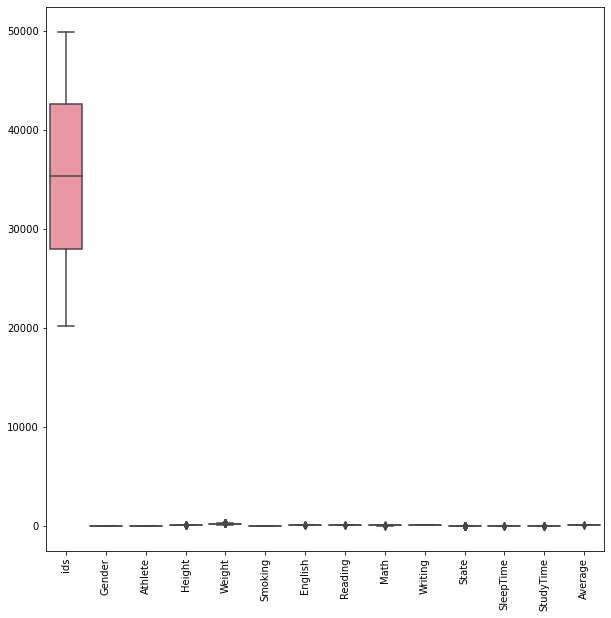

In [13]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.8)
plt.xticks(rotation=90)

In [14]:
data.to_csv('Edited_data.csv')